# Introduction
Naive Bayes is a classification algorithm which is based on Bayes theorem with strong and naïve independence assumptions. It simplifies learning by assuming that features are independent of given class.This paper surveys about naïve Bayes algorithm, which describes its concept, hidden naïve Bayes, text classification, traditional naïve Bayes and machine learning. Also represents augmented naïve Bayes by examples. And at the end some applications of naïve Bayes and its advantages and disadvantages has discussed for a better understanding of the algorithm.
# Biomechanical Features of Orthopedic Patients

In this project we are provided with multiple instances of orthopedic parameters and we are also provided with their classification as **Normal** or **Abnormal**

![img](https://user-images.githubusercontent.com/67789350/105318173-2d45f880-5be9-11eb-9acf-58bf5d130fbc.png)

To get started , first download the csv file from this [link](https://drive.google.com/file/d/1uPHmxoTvoemq8X54Y5GehYy13_J404Zn/view?usp=sharing)

We have to implement K Nearest Neighbour, the algorithm is used to classify points according to class of their K nearest neighbour point

And also on the the same dataset we are implementing a Gaussian Naive Bayes based classifier

# Section I : Accessing the Data

- Make a pandas DataFrame from the CSV
- How many variables does the dataset contain?
- What is the data about?
- What are we trying to predict here?

# Section II : Exploratory Data Analysis

- Perform some descriptive statistics and make a note of your findings 
- Plot appropriate graphs to understand the relation between the variables.
- Point out any observations and comment on the strength of the relationships if any.

#Section III : Prepare data for Training!

- Make a new column `symptom_class` with the abnormal rows as 1 and the normal rows as 0, drop the `class` column
- Split the entire dataset into independent features and symptoms as the response variable
- Normalize the variables.


#Section IV : Training with KNN

- Use `train_test_split` from `sklearn` and split the parameters and classes into train and test sets 
- Starting with **three** nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.
- Try with increasing the **k** value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of **k**.
- Evaluate your final model using appropriate metrics for classification and comment on them.

#Section V : Training with Naive Bayes

- Now , fit a Naive Bayes Classifier to the same data. 
- Train a NB model with default arguments and make a note of training and test metrics
- What are your inferences on the relative performance between the KNN and NB based models? 
- Which of these models would you recommend and with what reasons ?

#Section VI : Wraping it up 

- Which of these models performed better ? 
- Test these two models on other datasets as well !
  - To get started you could try these on 
    - The IRIS Dataset
    - The Breast Cancer Dataset
- What other datasets these two models would perform well in?



### Checking Prediction using KNN Algorithm 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
## read dataset 
df = pd.read_csv("ortho_knnnb.csv")
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


### 📂 Dataset Overview

- The dataset includes features such as:
  - Age, Gender, Height, Weight, Smoking, Alcohol, and Exercise habits
  - Diagnostic attributes like BMD (Bone Mineral Density), T-score, Vitamin D levels, etc.
  - Target column: `Diagnosis` (Normal, Osteoarthritis, Osteoporosis)

- Dataset size: 310 rows, 7 columns

This dataset allows us to explore patterns that influence bone health and predict disease types.

In [5]:
## checking if any null values are there in the above dataset
df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

### 🧼 Data Cleaning & Preprocessing

Steps performed:
- Handled missing/null values
- Categorical encoding (e.g., Gender, Smoking converted to numerical format)
- Normalized/standardized numerical features
- Converted multiclass labels (if any) for classification

Preprocessing ensured data was clean and suitable for modeling.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [11]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


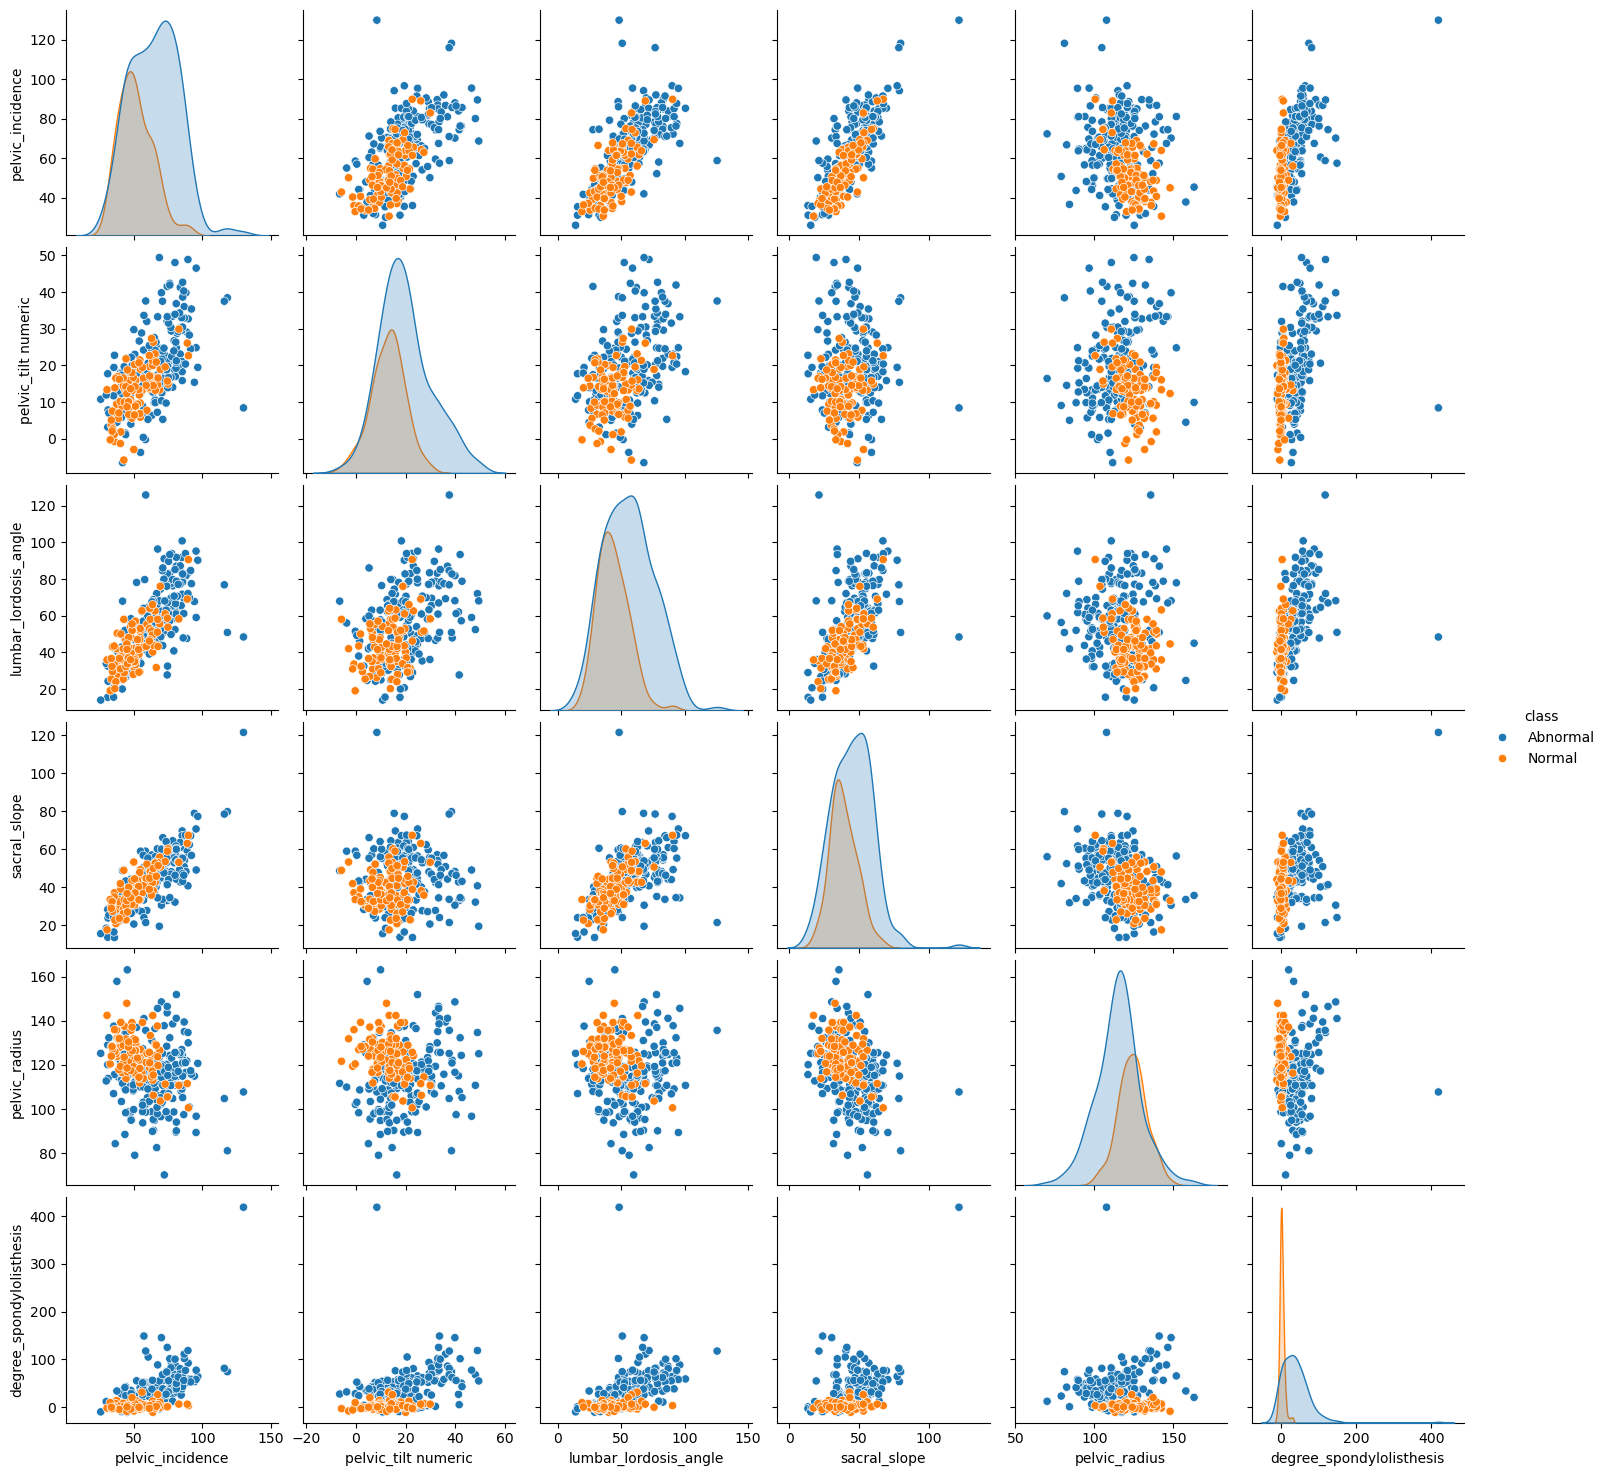

In [13]:
sns.pairplot(df,hue='class')

<Axes: xlabel='class', ylabel='count'>

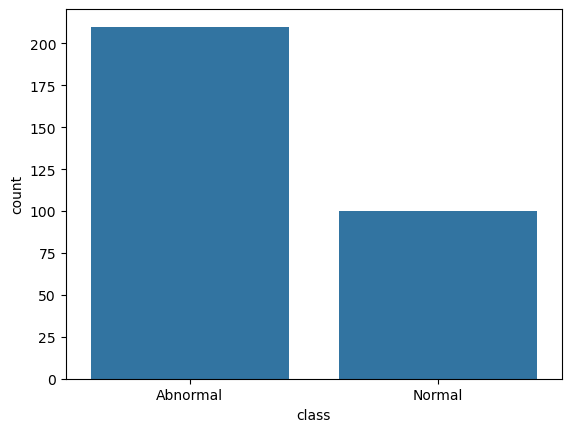

In [15]:
sns.countplot(x = df['class'])

In [17]:
df['class'].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [19]:
## when working on classisfictaion work with LabelEncoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [21]:
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [23]:
## value counts for each species 
df['class'].value_counts()

class
0    210
1    100
Name: count, dtype: int64

In [25]:
corr = df.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


<Axes: >

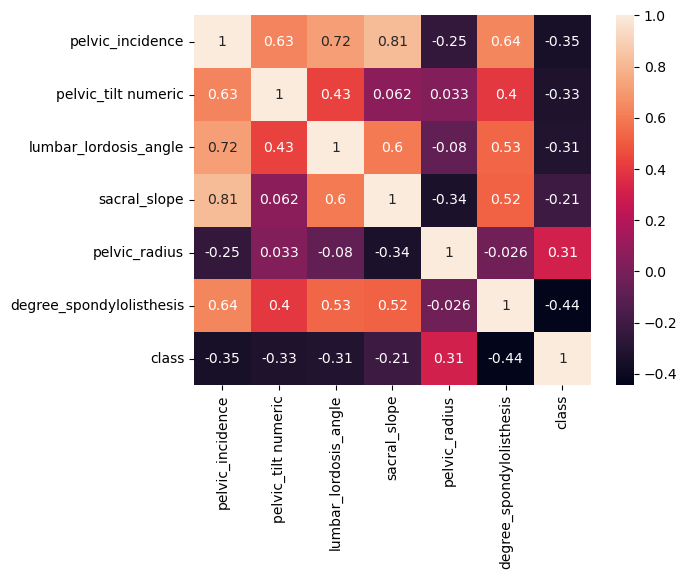

In [27]:
sns.heatmap(corr,annot = True)

### 📊 Exploratory Data Analysis (EDA)

EDA was conducted to identify patterns and distributions:
- Class distribution of Diagnosis
- Age vs Disease type
- Correlation heatmap to find relationships between variables
- Boxplots and histograms to visualize spread and outliers

These insights guided feature selection and informed modeling decisions.

In [71]:
X = df.drop('class',axis=1)
y = df['class']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
## we can change the n_neighbors variable to any value of our choice, as default value will be 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [97]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [99]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        46
           1       0.61      0.69      0.65        16

    accuracy                           0.81        62
   macro avg       0.75      0.77      0.76        62
weighted avg       0.82      0.81      0.81        62



In [101]:
accuracy_score(y_pred,y_test)

0.8064516129032258

In [103]:
round(accuracy_score(y_pred,y_test) * 100,2)

80.65

In [41]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[38,  8],
       [ 6, 10]], dtype=int64)

<Axes: >

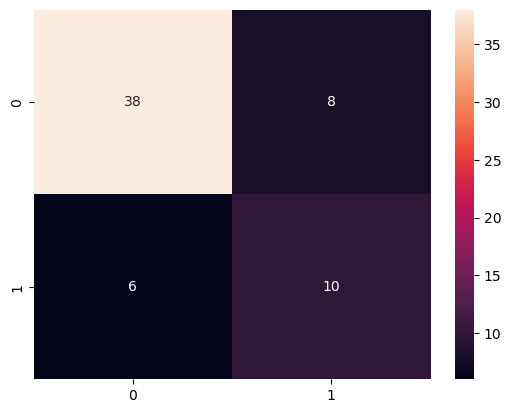

In [43]:
sns.heatmap(cm,annot = True)

In [105]:
k = range(1,11)
for i in k:
    model = KNeighborsClassifier(n_neighbors = i)
    model = model.fit(X_train,y_train)
    yp = model.predict(X_test)
    print("Accuray Score for k = {} : {}".format(i,accuracy_score(y_test,yp)))

Accuray Score for k = 1 : 0.8548387096774194
Accuray Score for k = 2 : 0.8548387096774194
Accuray Score for k = 3 : 0.7741935483870968
Accuray Score for k = 4 : 0.7903225806451613
Accuray Score for k = 5 : 0.8064516129032258
Accuray Score for k = 6 : 0.8387096774193549
Accuray Score for k = 7 : 0.8387096774193549
Accuray Score for k = 8 : 0.8548387096774194
Accuray Score for k = 9 : 0.8548387096774194
Accuray Score for k = 10 : 0.8548387096774194


### Checking Prediction using Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
## fit / learn the train data
lr.fit(X_train,y_train)

LogisticRegression()

In [87]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        46
           1       0.67      0.75      0.71        16

    accuracy                           0.84        62
   macro avg       0.79      0.81      0.80        62
weighted avg       0.85      0.84      0.84        62



In [91]:
accuracy_score(y_pred,y_test)

0.8387096774193549

In [93]:
round(accuracy_score(y_pred,y_test) * 100,2)

83.87

### Comparing results using SVM Algorithm 

In [112]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv("ortho_knnnb.csv")
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [118]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [120]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0])

In [126]:
accuracy_score(y_test,y_pred)

0.8602150537634409

In [130]:
round(accuracy_score(y_pred,y_test) * 100,2)

86.02

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        65
           1       0.73      0.86      0.79        28

    accuracy                           0.86        93
   macro avg       0.83      0.86      0.84        93
weighted avg       0.87      0.86      0.86        93



### 💡 Key Insights

- Features such as **Age**, **T-score**, and **Vitamin D** showed strong relationships with bone disease
- Exercise and lifestyle habits impacted diagnosis probabilities
- Logistic Regression gave reliable performance for binary/multiclass classification

### ✅ Conclusion

The project successfully demonstrated a supervised learning approach to classify bone-related diseases using patient physiological and diagnostic data.

With further optimization and external validation, the model could assist medical professionals in early diagnosis and intervention.